<h1>Recorrido de Grafos</h1>

Dado un grafo ponderado $(G , w )$ donde $G = (V , E )$ y $w : E  \mapsto \mathbb R$, un
arbol de expansión mı́nima es un arbol de expansión en el que la suma
de los pesos w de las aristas es mı́nima.

<h2>Algoritmo Prim</h2>

El algoritmo de Prim construye un arbol visitando vértices de
manera iterativa hasta que se obtiene un árbol de expansión mı́nima.Se comienza desde un vértice cualquiera y en cada iteración se agrega la arista que tenga el mı́nimo peso y no complete un ciclo.
La complejidad computacional del algoritmo de Prim es $O(V \operatorname{log} V)$.
El siguiente pseudo-código implementa el algoritmo mediante una cola de prioridad:


<img src="images/algoritmo_prim.png" />

<h2>Algoritmo Kruskal</h2>

El algoritmo de Kruskal construye un arbol visitando aristas de
manera iterativa hasta que se obtiene un árbol de expansión mı́nima.
Se comienza desde un vértice cualquiera y en cada iteración se
agrega la arista que tenga el mı́nimo peso y no complete un ciclo.
La complejidad computacional del algoritmo de Kruskal es $O(E \operatorname{log} E)$.


<img src="images/algoritmo_kruskal.png" />

In [38]:
import networkx as nx

G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
E={(1,2):1,(3,4):2,(2,4):1}
G.add_weighted_edges_from([ (u,v,w) for (u,v),w in E.items()])


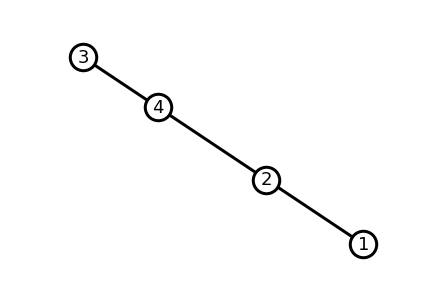

In [43]:
import matplotlib.pyplot as plt

options = {
    "font_size": 18,
    "node_size": 700,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    'with_labels':True
}
nx.draw(G,**options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [44]:
T_prim=nx.minimum_spanning_tree(G,algorithm='prim')

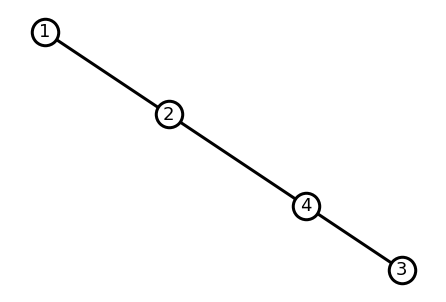

In [45]:
nx.draw(T_prim,**options)

In [55]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [53]:
if IN_COLAB:
    !wget url_path='https://raw.githubusercontent.com/sherna90/matematicas_discretas/master/data/talca_ciclovias.graphml'
else:
    G_talca=nx.read_graphml('data/talca_ciclovias.graphml')

<h2>Ejercicio</h2>

Se desea construir un acueducto que una las ciudades de la region del Maule. El costo en distancia se encuentra en mm en un archivo csv.

In [37]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/sherna90/matematicas_discretas/master/data/distancias_maule.csv', encoding = 'utf-8',dtype={'WKT':str,'InputID':str,'TargetID':str,'Distance':float}) 

df.loc[df['InputID']=='TALCA'].head()

,WKT,InputID,TargetID,Distance
0,"MULTIPOINT ((-71.661999 -35.432349),(-71.59687...",TALCA,PANGUILEMO,9402.992976
1,"MULTIPOINT ((-71.661999 -35.432349),(-71.56431...",TALCA,HUILQUILEMU,9026.792210
2,"MULTIPOINT ((-72.412391 -35.335426),(-71.66199...",TALCA,CONSTITUCION,69023.063640
3,"MULTIPOINT ((-72.333641 -35.427048),(-71.66199...",TALCA,SANTA OLGA,60993.437978
4,"MULTIPOINT ((-72.494926 -35.469452),(-71.66199...",TALCA,LOS PELLINES,75728.660537


In [67]:
df['WKT'] = df['WKT'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df['InputID'] = df['InputID'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df['TargetID'] = df['TargetID'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df['InputID'].unique()

array(['TALCA', 'PANGUILEMO', 'HUILQUILEMU', 'CONSTITUCION', 'SANTA OLGA',
       'LOS PELLINES', 'CUREPTO', 'EMPEDRADO', 'MAULE', 'CULENAR',
       'VILLA FRANCIA', 'CHACARILLAS', 'PELARCO', 'PENCAHUE', 'CUMPEO',
       'SAN CLEMENTE', 'SAN RAFAEL', 'CAUQUENES', 'CHANCO', 'PELLUHUE',
       'QUILICURA', 'CURICO', 'SARMIENTO', 'VILLA LOS NICHES',
       'SAN ALBERTO', 'HUALAE', 'LICANTEN', 'ILOCA', 'MOLINA',
       'ITAHUE UNO', 'RAUCO', 'ROMERAL', 'SAGRADA  FAMILIA', 'VILLA PRAT',
       'TENO', 'LLICO', 'LAGO VICHUQUEN', 'LINARES', 'VARA GRUESA',
       'LAS OBRAS', 'COLBUN', 'PANIMAVIDA', 'LONGAVI', 'PARRAL', 'RETIRO',
       'COPIHUE', 'SAN JAVIER', 'BOBADILLA', 'VILLA ALEGRE',
       'YERBAS BUENAS'], dtype=object)

In [90]:
import numpy as np
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1000
